# Zeitreihenanalyse

Die *Zeitreihenanalyse* (engl. *time series analysis*) behandelt die Analyse von geordneten Sequenzen von Daten, zum Beispiel Daten, die über die Zeit gemessen wurden. {numref}`fig-timeseries-example` zeigt ein Beispiel für eine Zeitreihe: Das Liniendiagramm zeigt die monatlichen Werte der Passagierzahlen einer Fluggesellschaft zwischen 1949 und 1961. Es gibt also für jeden Monat eine Instanz in den Daten. Das Ziel der Zeitreihenanalyse besteht darin, die zeitliche Struktur der Daten zu beschreiben, also ein Modell zu finden, das die monatlichen Änderungen erklärt. Mit einem solchen Modell kann man entweder retrospektiv die Daten analysieren, um Wissen zu extrahieren, oder sogar die Werte für die nächsten Zeitschritte vorhersagen.

```{figure} images/timeseries_example_german.png
---
width: 600px
name: fig-timeseries-example
---
Entwicklung der Passagierzahlen bei einer amerikanischen Fluggesellschaft
```

Etwas abstrakter kann man die Zeitreihenanalyse wie in {numref}`fig-timeseries-concept` beschreiben. Unsere Daten sind zeitlich durchnummerierte Werte. Das Zeitreihenmodell beschreibt, wie sich die Werte mit jedem dieser durchnummerierten Zeitschritte ändern. Dieses Problem ist ähnlich zur Regression: Wenn wir sagen, dass der Zeitpunkt unser Merkmal ist und der Wert zu diesem Zeitpunkt die abhängige Variable, können wir mit einer Regression ein sehr einfaches Zeitreihenmodell berechnen. Wie wir jedoch im Folgenden sehen werden, geht die Zeitreihenanalyse über Regressionsmodelle hinaus.


```{figure} images/timeseries_concept_german.png
---
width: 600px
name: fig-timeseries-concept
---
Konzept der Zeitreihenanalyse
```

Formal haben wir diskrete Werte $\{x_1, .., x_T\} = \{x_t\}_{t=1}^T$ mit $x_t \in \mathbb{R}$. Wir nutzen die Notation $\{x_t\}$ als Kurzform für $\{x_t\}_{t=1}^T$. Aus mathematischer Sicht sind diese Werte eine Folge von Zufallsvariablen bzw. ein diskreter stochastischer Prozess. Aus der Tatsache, dass wir durchnummerierte Zeitpunkte betrachten, folgt, dass der Abstand zwischen den Zeitpunkten $t$ und $t+1$ gleich sein muss für alle $t=1, ..., T-1$. Diese feste Schrittgröße könnte zum Beispiel eine Minute, Stunde, Woche oder - wie in unserem Beispiel - ein Monat sein. 

Eine Zeitreihe besteht aus verschiedenen Komponenten, von denen wir drei betrachten:

- Der *Trend* der Zeitreihe $T_t$. Der Trend ist die Veränderung insgesamt über die Zeit, also zum Beispiel das stetige Wachstum oder die Reduktion der Werte. Ein Beispiel für einen Trend ist der stetig steigende Energiebedarf in vielen Ländern.
- Die *Saisonalität* der Zeitreihe $S_t$. Die Saisonalität ist die Folge von saisonalen Effekten, also regelmäßig zu bestimmten Zeitpunkten wiederkehrenden Abweichungen vom allgemeinen Trend. Ein Beispiel für einen saisonalen Effekt ist der erhöhte Energieverbrauch im Winter durch Heizkosten und Beleuchtung.
- Die *Autokorrelation* zwischen den Zeitpunkten $R_t$. Die Autokorrelation modelliert, wie der Wert zum Zeitpunkt $t$ von den vorherigen Zeitpunkten abhängt, also wie $x_t$ mit den Werten $x_{t-1}, x_{t-2}, ...$ korreliert ist. Die Autokorrelation modelliert die Änderungen der Zeitreihe, die nicht durch den Trend oder den saisonalen Effekt erfasst werden.

Zusammen ergeben diese drei Komponenten den Wert der Zeitreihe als

$$x_t = T_t + S_t + R_t.$$

## Box-Jenkins-Verfahren

Zur Zeitreihenanalyse betrachten wir sogenannte *Box-Jenkins*-Modelle. Beim Box-Jenkins-Ansatz wird zuerst sichergestellt, dass die Zeitreihe *stationär* ist. Anschließend wird die Autokorrelation als stochastischer Prozess modelliert, der die Werte der letzten Zeitschritte mit einer zufälligen Komponente kombiniert. Stationär bedeutet, dass sich weder der Mittelwert noch die Varianz über die Zeit verändern. Für eine Zeitreihe bedeutet das, dass es keinen Trend und keine saisonalen Effekte geben darf. Der Trend kann auch als mittlere Veränderung des Mittelwerts über die Zeit betrachtet werden. Die Saisonalität kann man als sich regelmäßig wiederholende lokale Veränderung des Mittelwerts interpretieren. Die Varianz ist im Wesentlichen die zufällige Streuung der Daten um den Mittelwert.

Im Folgenden betrachten wir jeden Aspekt des Box-Jenkins-Ansatzes. Zuerst schauen wir uns an, wie man den Trend und die Saisonalität einer Zeitreihe bestimmt und wie man diese anschließend aus den Daten entfernt, damit die Daten stationär sind. Anschließend betrachten wir ARMA-Modelle, um die Autokorrelationen zu erfassen. Für die Erklärung der Methoden nutzen wie die Daten über Flugpassagiere, die wir oben schon gesehen haben.

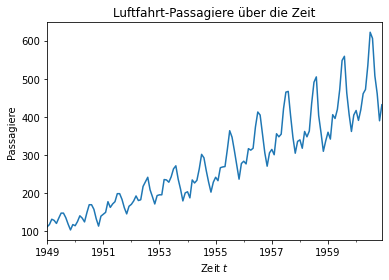

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

air_passengers_df = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0, squeeze=True)

fig, ax = plt.subplots()
ax.set_title("Luftfahrt-Passagiere über die Zeit")
air_passengers_df.plot(ax=ax)
ax.set_xlabel('Zeit $t$')
ax.set_ylabel('Passagiere')
plt.show()

## Trends und Saisonale Effekte

Unser Ansatz, die Daten einer Zeitreihe stationär zu machen, besteht darin, dass wir zuerst den Trend $T_t$ und anschließend die Saisonalität $S_t$ modellieren und diese von den Daten abziehen. Im Detail ist der Ablauf wie folgt:

- Wir modellieren den Trend $T_t$ der Zeitreihe $\{x_t\}$. 
- Wir berechnen die trendbereinigte Zeitreihe $\hat{x}_t = x_t-T_t$.
- Wir modellieren die Saisonalität $S_t$ der trendbereinigten Zeitreihe $\{\hat{x}_t\}$. 
- Wir berechnen die trend- und saisonbereinigte Zeitreihe $\hat{\hat{x}}_t\ = \hat{x}_t -S_t$.

Wir betrachten jeweils zwei Ansätze für die Modellierung des Trends und der Saisonalität. 

### Regression und das saisonale Mittel

Der erste Ansatz für die Trendbereinigung ist eine Regression. Der Trend der Flugpassagierdaten sieht ungefähr linear aus, das heißt, wir sehen ein über die Zeit gleichmäßiges Wachstum. In diesem Fall können wir eine lineare Regression berechnen, um den Trend zu modellieren.

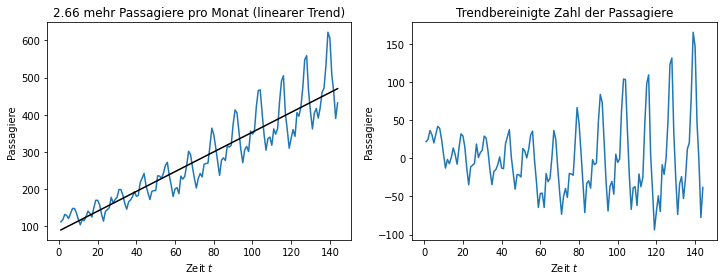

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression


X = np.arange(1,air_passengers_df.shape[0]+1).reshape(-1,1)
Y = air_passengers_df.values

regr = LinearRegression()
regr.fit(X,Y)
T_pred = regr.predict(X)
air_passengers_detrended = air_passengers_df - T_pred

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('%.2f mehr Passagiere pro Monat (linearer Trend)' % regr.coef_[0])
axes[0].plot(X, Y)
axes[0].plot(X, T_pred, color='black')
axes[0].set_xlabel('Zeit $t$')
axes[0].set_ylabel('Passagiere')

axes[1].set_title('Trendbereinigte Zahl der Passagiere')
axes[1].plot(X, air_passengers_detrended)
axes[1].set_xlabel('Zeit $t$')
axes[1].set_ylabel('Passagiere')
plt.show()

Links sehen wir die lineare Regression der Zeitreihe. Wie man sieht, passt die Regression sehr gut zur Form der Zeitreihe. Die Steigung der Regression (also der Koeffizient) ist das monatliche Wachstum der Passagierzahlen. Dies ist der Vorteil der Regression zur Modellierung des Trends: Wir können nicht nur die trendbereinigte Zeitreihe berechnen, sondern bekommen auch noch eine genaue Interpretation des Trends, nämlich dass es 2,66 mehr Passagiere jeden Monat gibt.

Rechts sehen wir die trendbereinigte Zeitreihe. Man sieht, dass sich das Mittel der Werte nicht mehr erhöht, die Werte sind also in etwa zentriert um die 0. Dies sollte nach einer erfolgreichen Trendbereinigung immer der Fall sein. Wir können außerdem die Datenbereiche der y-Achsen vergleichen. Links war die Größe des Datenbereichs noch $600-100=500$. Rechts ist die Größe nur noch $150-(-100)=250$. Der Trend erklärt also in etwa 50% der absoluten Änderung der Werte über die Zeit.

Die trendbereinigten Daten haben noch ein klares Muster in der Schwankung rund um null. Das ist die Saisonalität der Daten. Da wir monatliche Daten haben, ist es eine vernünftige Annahme, dass es sich um ein jährliches Muster handelt. Dies können wir durch das *saisonale Mittel* erfassen. Hierzu müssen wir die Länge der Saison kennen, also die Anzahl von Zeitschritten, nach der eine Saison von vorne beginnt. In unseren Beispieldaten können wir die Saison durch das *monatliche Mittel* mit einer Länge von $s=12$ Zeitschritten für die Saison modellieren. Hierzu berechnen wir die Differenz der monatlichen Mittelwerte vom gesamten Mittelwert der Zeitreihe. Das können wir dann von der trendbereinigten Zeitreihe abziehen, um die trend- und saisonbereinigte Zeitreihe zu erhalten als

$$\hat{\hat{x}}_t = \hat{x}_t - (mean(\{\hat{x}_{t'}\}_{\{t' \in 1, ..., T: mod(t',s)=mod(t,s)\}}-mean(\{\hat{x}_t\})),$$

wobei $mod(t,s)$ der Rest der Division von $t$ durch $s$ ist. Für $s=12$ und $t=26$ ist $mod(t,s)=2$. Das saisonale Mittel würde man zum Beispiel für alle Zeitpunkte $t'$ mit $mod(t',s) = 2$ berechnen, also 2, 14, 26, 38 etc. Bei unseren Beispieldaten bekommen wir für eine Saison der Länge $s=12$ folgendes Ergebnis. 

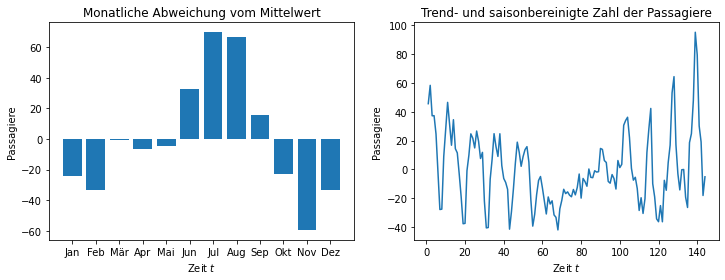

In [3]:
monthly_means = air_passengers_detrended.groupby(air_passengers_detrended.index.month).mean()

# mean of detrended data is zero
air_passengers_detrended_unseasonal = air_passengers_detrended - np.tile(monthly_means,12)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Monatliche Abweichung vom Mittelwert')
axes[0].bar(['Jan','Feb','Mär','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Dez'], monthly_means)
axes[0].set_xlabel('Zeit $t$')
axes[0].set_ylabel('Passagiere')

axes[1].set_title('Trend- und saisonbereinigte Zahl der Passagiere')
axes[1].plot(X, air_passengers_detrended_unseasonal)
axes[1].set_xlabel('Zeit $t$')
axes[1].set_ylabel('Passagiere')
plt.show()

Wie man sieht, gibt es im Juli im Mittel über 60 Passagiere mehr als im Gesamtmittel. Im November sind es hingegen 60 Passagiere weniger. Der saisonale Effekt der anderen Monate schwankt zwischen diesen beiden Werten. Im März gibt es zum Beispiel fast gar keinen saisonalen Effekt. Das saisonale Mittel liefert, ähnlich wie die Regression, also eine genaue Information über die Veränderung.

Wenn wir den saisonalen Effekt entfernen, bekommen wir die Zeitreihe in der rechten Grafik. Der Datenbereich der y-Achse ist jetzt auf $100-(-40)=140$ reduziert. Durch Trend und Saisonalität konnten wir also bereits den Großteil der Varianz in den Daten erklären. Leider erkennt man immer noch ein Muster in den Daten. Das ursprüngliche saisonale Muster hatte eine Spitze nach oben und zwei direkt nebeneinander liegende Spitzen nach unten. Das saisonbereinigte Muster sieht etwas anders aus:

- Für $t<70$ gibt es zwei Spitzen nach oben und eine Spitze nach unten. 
- Zwischen $t=80$ und $t=100$ gibt es keine klar erkennbaren Spitzen. 
- Für $t>100$ gibt es eine Spitze nach oben und zwei Spitzen nach unten. 

Das Muster zeigt, dass der saisonale Effekt nicht vollständig korrigiert wurde. Der Grund dafür ist, dass der saisonale Effekt auch einen Trend hat: Genau wie die Zahl der Passagiere steigt, werden auch die Schwankungen während der Saison von Jahr zu Jahr stärker. In der Mitte der Daten passt die Schätzung des saisonalen Mittels. Zu Beginn der Daten ist die Schätzung des saisonalen Mittels höher als die eigentliche saisonale Abweichung, weshalb das saisonale Muster invertiert wird. Am Ende der Daten ist das saisonale Mittel kleiner als die eigentliche saisonale Abweichung, weshalb ein Teil des saisonalen Effekts nicht korrigiert wird.

Insgesamt ist unsere Zeitreihe also nicht vollständig stationär, da es immer noch Muster in den Daten gibt und insbesondere die Varianz daher nicht überall gleich ist. Dieses Muster ist jedoch relativ schwach, wenn man berücksichtigt, wie viel Information wir bereits durch den Trend und die Saison erklärt haben. Dies kann man sich veranschaulichen, indem wir die y-Achse wieder mit einem Datenbereich der ursprünglichen Größe von 500 anzeigen.

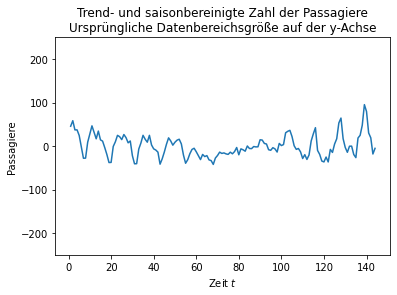

In [4]:
monthly_means = air_passengers_detrended.groupby(air_passengers_detrended.index.month).mean()

# mean of detrended data is zero
air_passengers_detrended_unseasonal = air_passengers_detrended - np.tile(monthly_means,12)

fig, ax = plt.subplots()
ax.set_title('Trend- und saisonbereinigte Zahl der Passagiere\nUrsprüngliche Datenbereichsgröße auf der y-Achse')
ax.plot(X, air_passengers_detrended_unseasonal)
ax.set_xlabel('Zeit $t$')
ax.set_ylabel('Passagiere')
ax.set_ylim(-250,250)
plt.show()

### Differencing

Der zweite Ansatz zur Bereinigung des Trends und der Saison ist das sogenannte *Differencing*. Wie der Name schon vermuten lässt, ist das Differencing an das Konzept der Ableitung angelehnt und führt zu einer besseren Bereinigung als die Regression und das saisonale Mittel. Die Idee des Differencing ist, dass der Trend nichts anderes als die Steigung der Zeitreihe ist und die Steigung ist nichts anderes als die erste Ableitung. Wenn der Trend nicht konstant ist, sondern sich mit der Zeit ändert, sieht man dies in der zweiten Ableitung. Wenn wir also den Trend berechnen und bereinigen wollen, können wir die Ableitung hierfür nutzen.

Das Differencing basiert auf einer Variante der *Punktsteigungsformel* zum Berechnen der Steigung einer Geraden. Die Steigung zwischen zwei Punkten $(x_1, y_1), (x_2, y_2)$ ist dann definiert als $\frac{y_2-y_1}{x_2-x_1}$. Da wir äquidistante Zeitschritte $t$ haben, ist für zwei benachbarte Zeitpunkte $(t-1, x_{t-1}), (t, x_t)$ die Steigung

$$\frac{x_t-x_{t-1}}{t-(t-1)} = \frac{x_t-x_{t-1}}{1} = x_t-x_{t-1}.$$

Diese Steigung nennt man auch die *Differenz erster Ordnung* der Zeitreihe und wir schreiben

$$\Delta^1 x_t = x_t - x_{t-1}.$$

Mit der Differenz erster Ordnung kann man lineare Trends entfernen als  

$$\hat{x}_t = \Delta^1 x_t.$$

Wenn sich die Änderung des Mittelwerts mit der Zeit ändert, müssen wir die *Differenz zweiter Ordnung* berechnen, die definiert ist als

$$\Delta^2 x_t = \Delta^1 x_t - \Delta^1 x_{t-1} = x_t - 2\cdot x_{t-1} + x_{t-2}.$$

Da wir in etwa einen linearen Trend in unseren Daten haben, können wir ohne Weiteres die Differenz erster Ordnung zur Trendbereinigung benutzen.

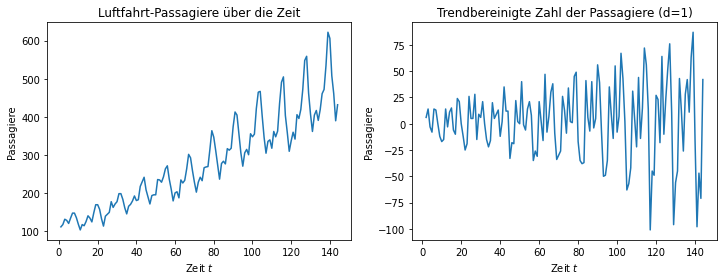

In [5]:
air_passengers_differenced = air_passengers_df.diff(1)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Luftfahrt-Passagiere über die Zeit')
axes[0].plot(X, Y)
axes[0].set_xlabel('Zeit $t$')
axes[0].set_ylabel('Passagiere')

axes[1].set_title('Trendbereinigte Zahl der Passagiere (d=1)')
axes[1].plot(X, air_passengers_differenced)
axes[1].set_xlabel('Zeit $t$')
axes[1].set_ylabel('Passagiere')
plt.show()

Die trendbereinigte Zeitreihe ist um null zentriert, aber wir sehen immer noch saisonale Schwankungen. Der Datenbereich der y-Achse ist auf $75-(-100)=175$ reduziert, der Trend erklärt also bereits etwa zwei Drittel der Änderung der Werte über die Zeit. 

Differencing kann auch zur Modellierung der Saison genutzt werden. Hierzu betrachtet man aber nicht benachbarte Zeitpunkte, sondern die Differenz zwischen zwei aufeinander folgenden Punkten der Saison. Wenn unsere Saison eine Länge von $s$ hat, können wir die Saison bereinigen, indem wir $\hat{\hat{x}} = \Delta_s \hat{x}_t$ berechnen als

$$\Delta_s \hat{x}_t = \hat{x}_t - \hat{x}_{t-s}.$$

Das saisonale Differencing mit einer Saison von $s=12$ Zeitschritten führt zu folgendem Ergebnis. 

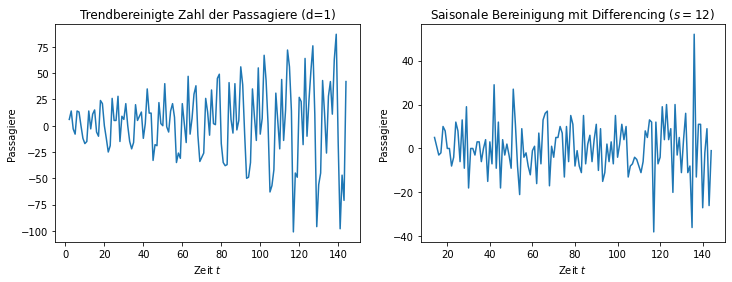

In [6]:
air_passengers_differenced_seasonal = air_passengers_differenced.diff(periods=12)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title('Trendbereinigte Zahl der Passagiere (d=1)')
axes[0].plot(X, air_passengers_differenced)
axes[0].set_xlabel('Zeit $t$')
axes[0].set_ylabel('Passagiere')

axes[1].set_title('Saisonale Bereinigung mit Differencing ($s=12$)')
axes[1].plot(X, air_passengers_differenced_seasonal)
axes[1].set_xlabel('Zeit $t$')
axes[1].set_ylabel('Passagiere')
plt.show()

Nach der Bereinigung ist auf der rechten Seite kein Muster mehr in den Daten zu erkennen. Die Schwankung um null sieht komplett zufällig aus, was ein starker Hinweis darauf ist, dass die Daten jetzt stationär sind. Der Bereich der y-Achse ist jetzt auf $40-(-40)=80$ reduziert, also noch mal halbiert gegenüber der trendbereinigten Zeitreihe.

### Vergleich der Ansätze

Beide Ansätze, den Trend und die Saison zu modellieren, haben Stärken und Schwächen. Der Vorteil der Regression und der saisonalen Mittelwerte ist die Interpretierbarkeit. Da dies jedoch nur bei linearen Trends und saisonalen Effekten ohne Trend funktioniert, ist die Anwendbarkeit des Verfahrens limitiert und die Daten sind hinterher möglicherweise nicht stationär. Beim Differencing ist das Gegenteil der Fall: Die Bereinigung des Trends und der saisonalen Effekte funktioniert in der Regel sehr gut, da man auch Differenzen höherer Ordnung verwenden kann. Dafür gibt es keine Formel, die man interpretieren kann.

## Autokorrelationen mit ARMA

Der letzte Aspekt der Zeitreihe, den wir noch modellieren müssen, ist die Autokorrelation.

### Autokorrelation und partielle Autokorrelation

Die Autokorrelation ist der direkte Zusammenhang zwischen Werten der Zeitreihe an unterschiedlichen Zeitpunkten. Es handelt sich also um die Korrelation der Zeitreihe mit sich selbst. 

> **Bemerkung:**
>
> *Auto* ist Latein für *selbst*, es handelt sich also in diesem Zusammenhang um das lateinische Wort, und nicht um die Kurzform von *automatisch*. 

Die Autokorrelation kann man sich als Scatterplot darstellen. Wir können zum Beispiel die Beziehung zwischen benachbarten Zeitpunkten für die trend- und saisonbereinigten Daten betrachten. 

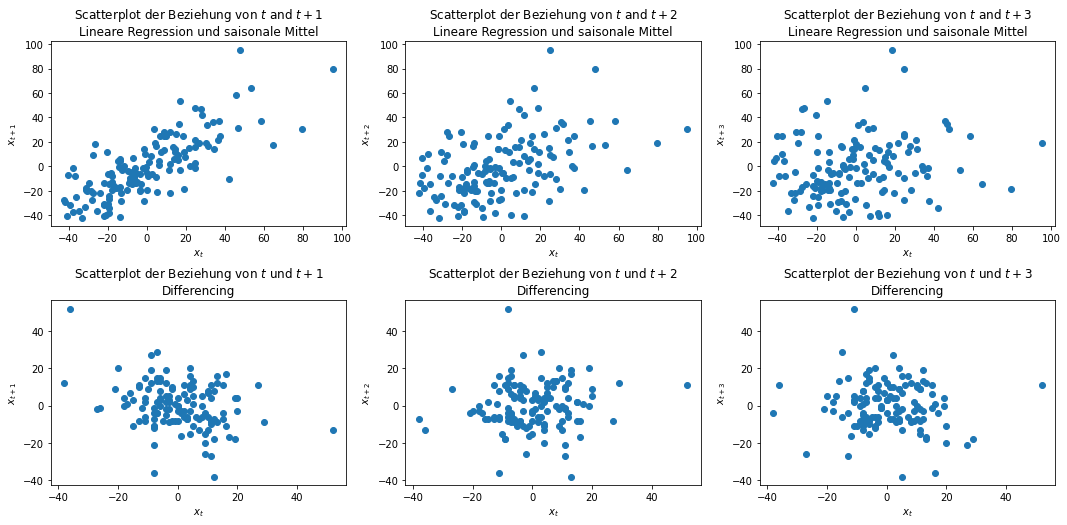

In [7]:
from pandas.plotting import lag_plot

fig, axes = plt.subplots(2, 3, figsize=(18, 7))

for i in range(1,4):
    axes[0,i-1].set_title('Scatterplot der Beziehung von $t$ and $t+%i$\nLineare Regression und saisonale Mittel' % i)
    lag_plot(air_passengers_detrended_unseasonal,lag=i, ax=axes[0,i-1])
    axes[0,i-1].set_xlabel('$x_t$')
    axes[0,i-1].set_ylabel('$x_{t+%i}$'%i)
    
    axes[1,i-1].set_title('Scatterplot der Beziehung von $t$ und $t+%i$\nDifferencing'%i)
    lag_plot(air_passengers_differenced_seasonal,lag=i, ax=axes[1,i-1])
    axes[1,i-1].set_xlabel('$x_t$')
    axes[1,i-1].set_ylabel('$x_{t+%i}$'%i)

plt.subplots_adjust(left=None, bottom=0, right=None,
                top=None, wspace=None, hspace=0.4)
plt.show()

In der ersten Spalte sehen wir die Beziehung zum nächsten Zeitschritt, die zweite Spalte zeigt die Beziehung zwei Schritte in die Zukunft und die dritte Spalte drei Schritte in die Zukunft. Bei der linearen Regression und dem saisonalen Mittel erkennen wir, dass es eine lineare Beziehung zwischen $x_t$ und $x_{t+1}$ gibt, die mit $x_{t+2}$ schwächer wird und bei $x_{t+3}$ verschwindet. Diese Beziehung ist die Autokorrelation. In der zweiten Zeile sehen wir keinerlei Beziehungen, die Daten sind zufällig verteilt. Das deutet darauf hin, dass es keinen direkten Zusammenhang mehr zwischen den Zeitpunkten gibt.

Die obige Darstellung der Autokorrelation ignoriert noch einen wichtigen Aspekt: 

- $x_{t+2}$ ist mit $x_{t+1}$ korreliert. 
- $x_{t+1}$ ist mit $x_{t}$ korreliert.
- Wie viel der Korrelation zwischen $x_{t+2}$ und $x_{t}$ wird bereits durch die indirekte Korrelation zwischen $x_{t+2}$ und $x_{t}$ über $x_{t+1}$ erklärt? 

Es gibt also einen gewissen Übertrag (engl. *carry over*) zwischen den Zeitpunkten. Dieser Zusammenhang klingt in der abstrakten Beschreibung etwas kompliziert, wird aber durch ein Beispiel schnell klar. Wenn die Passagierzahlen vom März mit den Zahlen aus dem Februar zusammenhängen und der Wert vom Februar mit dem Wert vom Januar, dann hat der Wert aus dem Januar hierdurch eine indirekte Auswirkung auf den März. Das bedeutet, dass ein Teil der Korrelation von Januar und Februar sich auf den März überträgt. 

Das heißt jedoch nicht, dass es nicht auch noch einen direkten Zusammenhang zwischen Januar und März geben kann, der sich nicht durch den Übertrag erklären lässt. Dies ist die partielle Autokorrelation, also nur die direkte Korrelation zwischen Zeitpunkten ohne den Übertrag. In unserem Beispiel haben wir die folgenden Autokorrelationen und partiellen Autokorrelationen.

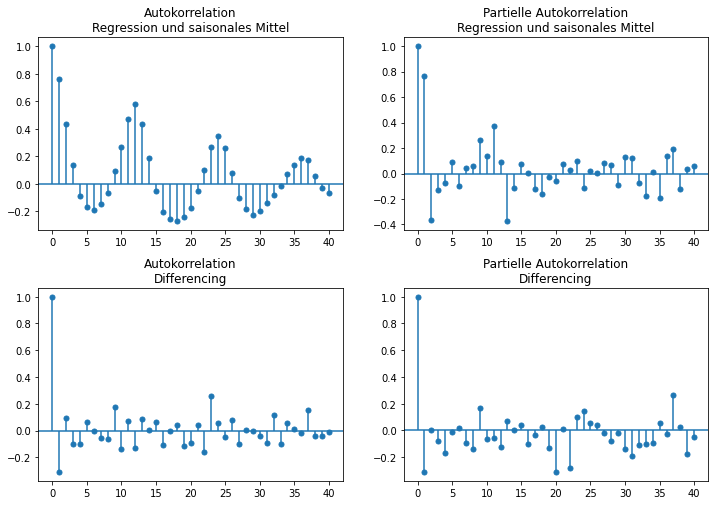

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 2, figsize=(12, 7))

plot_acf(air_passengers_detrended_unseasonal, lags=40, alpha=None, ax=axes[0,0], title="Autokorrelation\nRegression und saisonales Mittel")
plot_pacf(air_passengers_detrended_unseasonal, lags=40, alpha=None, ax=axes[0,1], title="Partielle Autokorrelation\nRegression und saisonales Mittel")
plot_acf(air_passengers_differenced_seasonal.dropna(), lags=40, alpha=None, ax=axes[1,0], title="Autokorrelation\nDifferencing")
plot_pacf(air_passengers_differenced_seasonal.dropna(), lags=40, alpha=None, ax=axes[1,1], title="Partielle Autokorrelation\nDifferencing")
plt.subplots_adjust(left=None, bottom=0, right=None,
                top=None, wspace=None, hspace=0.3)
plt.show()

Die Balken zeigen die Stärke der Korrelation. Auch wenn es keinen festen Richtwert für die Definition einer starken bzw. schwachen Korrelation gibt, verwenden wir im Folgenden die übliche Konvention, dass Werte, die absolut kleiner als 0,3 sind, bedeuten, dass es keine Korrelation gibt, Werte zwischen 0,3 und 0,5 auf eine schwache Korrelation hindeuten, Werte zwischen 0,5 und 0,7 auf eine moderate Korrelation und Werte größer als 0,7 auf eine starke Korrelation. Für uns sind nur Korrelationen relevant, die mindestens moderat sind.

In der ersten Zeile der obigen Visualisierung sehen wir die Autokorrelation und die partielle Autokorrelation der trend- und saisonbereinigten Zeitreihe. In der Autokorrelation erkennt man ein klares Muster von wechselnder positiver und negativer Korrelation über die Zeit mit einer Periode von 12 Zeitschritten. Dies ist der saisonale Effekt, der durch die unzureichende Korrektur der Saison übrig geblieben ist. Die partielle Autokorrelation zeigt, dass es einen direkten Einfluss auf $t+1$ gibt und dass es außerdem noch eine schwache Korrelation mit den Zeitschritten $t+10$ und $t+13$ gibt. Auch hier sieht man also noch die nicht vollständig korrigierte Saison, wenn auch deutlich schwächer.

In der zweiten Zeile sehen wir die Autokorrelation und die partielle Autokorrelation der durch Differencing bereinigten Zeitreihe. Wie auch schon in den Scatterplots gibt es keine Hinweise auf eine Korrelation, weder bei der Autokorrelation noch bei der partiellen Autokorrelation.

### AR, MA und ARMA

Was noch fehlt, ist ein Modell für die Autokorrelation. Ein häufig verwendeter Ansatz besteht darin, ein *AutoRegressives* (AR-) oder ein *Moving-Average*-(MA-)Modell zu benutzen. Wenn man beides zusammen verwendet, spricht man von einem *ARMA-Modell*.

Ein *AR-Modell* beschreibt die lineare Beziehung der Zeitschritte. Hierzu wird der direkte Einfluss der letzten $p$ Zeitpunkte auf den aktuellen Zeitpunkt modelliert als

$$c + \epsilon_t + \sum_{i=1}^p a_ix_{t-i},$$

wobei $c \in \mathbb{R}$ eine konstante Veränderung mit jedem Zeitpunkt ist, $\epsilon_t$  ist *weißes Rauschen* (engl. *white noise*) und $a_i \in \mathbb{R}, i=1, ..., p$ sind die Koeffizienten, die den Einfluss der letzten Zeitschritte bestimmen. Das AR-Modell kombiniert also eine feste Änderung $c$ mit einer zufälligen Änderung $\epsilon_t$ und einer linearen Regression der letzten $p$ Zeitpunkte. 

> **Bemerkung:**
>
> Weißes Rauschen entspricht einer Zufallsvariablen mit dem Erwartungswert null. Das heißt, dass der Wert im Mittel null ist, also den Mittelwert der Zeitreihe nicht beeinflusst. Üblicherweise wird weißes Rauschen durch eine Normalverteilung mit einem Mittelwert von null und mit einer kleinen Standardabweichung modelliert. 

Ein MA-Modell beschreibt, wie sich die Zeitreihe nur aufgrund des Zufalls weiterentwickelt. Dies geht über das $\epsilon$, das wir schon aus dem AR-Modell kennen, hinaus, indem nicht nur das weiße Rauschen des aktuellen Zeitschritts einen Einfluss hat, sondern auch die letzten $q$ zufälligen Schwankungen, sodass

$$c + \epsilon_t + \sum_{j=1}^q b_j \epsilon_{t-j}$$

mit $c$ und $\epsilon_t$ wie oben. Die Summe $\sum_{j=1}^q b_j \epsilon_{t-j}$ beschreibt den Einfluss des vergangenen weißen Rauschens auf die Zukunft. Dies kann man sich so vorstellen, dass eine zufällig erhöhte Passagierzahl im Januar möglicherweise zu einer Reduktion im Februar führt. Dies würde man dann durch einen negativen Koeffizienten $b_1$ im MA-Modell beschreiben.

Wenn wir AR mit MA kombinieren, haben wir ein ARMA-Modell für die Autokorrelation, das definiert ist als

$$x_t = c + \epsilon_t + \sum_{i=1}^p a_ix_{t-i} + \sum_{j=1}^q b_j \epsilon_{t-j}.$$

Das ARMA-Modell kombiniert also den Einfluss der letzten Zeitreihenwerte mit dem Einfluss der letzten zufälligen Schwankungen.

### Auswahl von $p$ und $q$

Um ein ARMA-Modell zu benutzen, müssen wir die Werte $p$ und $q$ bestimmen, also festlegen, wie viele vergangene Zeitschritte einen Einfluss haben sollen. Hierzu benutzen wir die Autokorrelation und die partielle Autokorrelation.

Zuerst wählen wir Werte für die mit Regression und saisonalen Mittel bereinigte Zeitreihe. Hier haben wir die folgenden (partiellen) Autokorrelationen. 

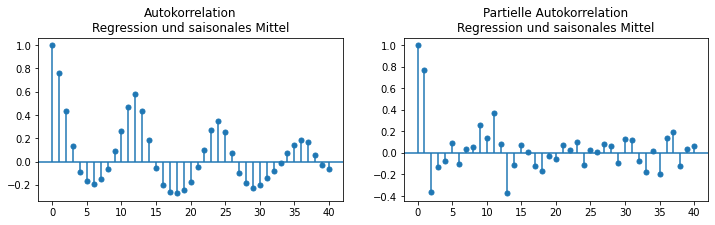

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
plot_acf(air_passengers_detrended_unseasonal, lags=40, alpha=None, ax=axes[0], title="Autokorrelation\nRegression und saisonales Mittel")
plot_pacf(air_passengers_detrended_unseasonal, lags=40, alpha=None, ax=axes[1], title="Partielle Autokorrelation\nRegression und saisonales Mittel")
plt.show()

Da AR den direkten Einfluss der vergangenen Werte modelliert, können wir die partielle Autokorrelation zur Wahl von $p$ nutzen. In unserem Beispiel wären $p=1$ und $p=13$ geeignete Werte. Mit $p=1$ hätte man ein kleines Zeitreihenmodell mit wenig Parametern, mit $p=13$ hingegen ein recht großes Modell. Das große Modell wäre genauer, da es den nicht korrigierten saisonalen Effekt miterfassen würde. Es wäre jedoch schwieriger, das Modell über die Koeffizienten zu interpretieren. Ein so hoher Wert von $p$ führt außerdem zu einem gewissen Risiko des Overfittings.

MA modelliert die langfristigen Auswirkungen zufälliger Schwankungen. Wenn man ein reines MA-Modell verwendet (also nicht ARMA), kann man $q$ anhand der Autokorrelation auswählen, da diese nach $q$ Zeitschritten gegen null gehen sollte. Dies wäre in unserem Beispiel erst nach Ablauf von drei Saisons der Fall. Das ignoriert bei einem ARMA-Modell jedoch den Übertrag durch die vergange-nen Werte der Zeitreihe, die ebenfalls vom weißen Rauschen beeinflusst werden, also vom AR-Teil des Modells. Die Autokorrelation mit $t+1$ wird bereits vollständig hierdurch abgedeckt, und durch den Übertrag wird somit auch ein gewisser Teil der Autokorrelation zum Zeitpunkt $t+2$ mit abgedeckt, usw. Wenn wir dies berücksichtigen, ist der verbleibende Einfluss der zufälligen Schwankun-gen relativ klein, sodass $q=1$ oder $q=12$ gute Werte wären, je nach Wahl von $p$.

Insgesamt haben wir also folgende Kandidaten für Paare von $p$ und $q$: 

- $p=1, q=1$, um ein kompaktes Modell der Zeitreihe zu erhalten, das aber eventuell den saisonalen Effekt nicht vollständig berücksichtigt. 
- $p=1, q=12$, um die MA-Komponente zu nutzen und damit den verbleibenden saisonalen Effekt zu modellieren.
- $p=13, q=1$ um die AR-Komponente zu nutzen und damit den verbleibenden saisonalen Effekt zu modellieren. 

Bei der Zeitreihe, die wir mit Differencing bereinigt haben, ist die Wahl von $p$ und $q$ einfacher, da wir folgende (partielle) Autokorrelationen haben. 

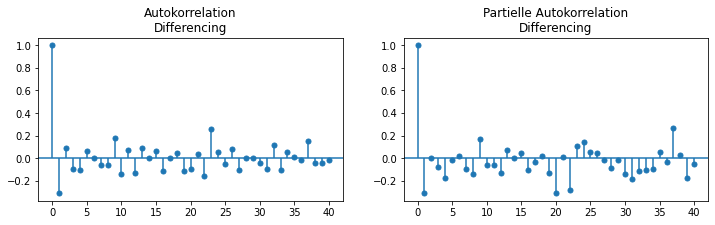

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
plot_acf(air_passengers_differenced_seasonal.dropna(), lags=40, alpha=None, ax=axes[0], title="Autokorrelation\nDifferencing")
plot_pacf(air_passengers_differenced_seasonal.dropna(), lags=40, alpha=None, ax=axes[1], title="Partielle Autokorrelation\nDifferencing")
plt.show()

Da es keine starke partielle Autokorrelation gibt, wählen wir $p=0$. In den Autokorrelationen sieht man lediglich bei $t+1$ einen Wert von etwa -0,3, anschließend schwanken die Werte um null. Da wir mit $p=0$ ein reines MA-Modell haben, sollten wir, wie oben erklärt, also $q=1$ wählen. 

### ARIMA

Oft findet man auch ARIMA-Modelle für die Zeitreihenanalyse mit den Parametern $p$, $d$ und $q$. ARIMA funktioniert genau wie ARMA, nur dass die Bereinigung des Trends durch Differencing über den Parameter $d$ ein Teil des Modells ist. ARIMA ist also das Gleiche wie ein ARMA-Modell, das auf eine durch Differencing trendbereinigte Zeitreihe angewendet wird.

## Jenseits von Box-Jenkins

Man kann Zeitreihen auch komplett anders modellieren, als wir es beschrieben haben. Ein gängiger Ansatz ist es, die Werte der letzten $k$ Zeitschritte als Merkmale zu nehmen und dann eine Regression hierfür zu definieren. In unserem Beispiel könnte man einfach die letzten $k=24$ Zeitschritte als Merkmale verwenden, um den nächsten Wert vorherzusagen. Dies ist vergleichbar mit einem AR-Modell mit $p=k$ ohne weißes Rauschen: Damit hat man einfach eine lineare Regression mit den letzten $k$ Zeitschritten als Merkmalen. Statt der linearen Regression kann man diesen Ansatz aber auch mit beliebigen anderen Regressionsalgorithmen nutzen, die wir am Ende von [Kapitel 8](kapitel_08) genannt haben. Bei den neuronalen Netzen gibt es auch spezielle Architekturen für Zeitreihen, wie zum Beispiel die in [Kapitel 7](kapitel_07) erwähnten Long-Short-Term-Memory-(LSTM-)Netzwerke.

## Übung

Mit dieser Übung wollen wir unsere Kenntnisse der Zeitreihenanalyse vertiefen, indem wir die Methoden aus diesem Kapitel anwenden. Als Daten verwenden wir den Umsatz von Online- und Versandshops von 2002 bis 2014 aus den USA [^sales]. 

### Trend- und Saisonbereinigung

Laden Sie die Daten. Verwenden Sie sowohl die lineare Regression und saisonale Mittel als auch Differencing, um den Trend und die saisonalen Effekte zu bereinigen. Vergleichen Sie die Ergebnisse mithilfe von Visualisierungen.

### Vorhersagen mit ARMA

Trainieren Sie ein ARMA-Modell mit geeigneten Parametern für $p$ und $q$ für beide Varianten der trend- und saisonbereinigten Daten. Entfernen Sie für das Training die Daten aus dem Jahr 2013. Benutzen Sie anschließend die Modelle, um Werte für das Jahr 2013 vorherzusagen, und visualisieren Sie den Unterschied zwischen den Vorhersagen und den wahren Werten. Dieser Vergleich sollte nicht nur die autoregressive Komponente ($R_t$), sondern die echten Werte $x_t = T_t+S_t+R_t$ berücksichtigen. Hierzu müssen Sie die saisonalen Effekte und den Trend auf die Vorhersage aus dem ARMA-Modell addieren.

[^sales]: https://data-science-crashkurs.de/exercises/data/online_and_mail_shopping.csv